# Model verification - Hadoop

In [7]:
from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    remove_setup_datapoints,
    trim_experiment,
)
from helpers.regression import (
    boxplot_two,
    boxplot_grid,
    draw_regression_graph,
    fit_regression,
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


plt.style.use('seaborn')

experiments_path = '../../data/basic'

## Hadoop vs Hadoop

In [8]:
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels

instances_n=8
experiment_name='hadoop_pagerank_1_hadoop_pagerank_7'
workload_a = 'hadoop'
workload_b = 'hadoop'
perf_metric = 'app_latency'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

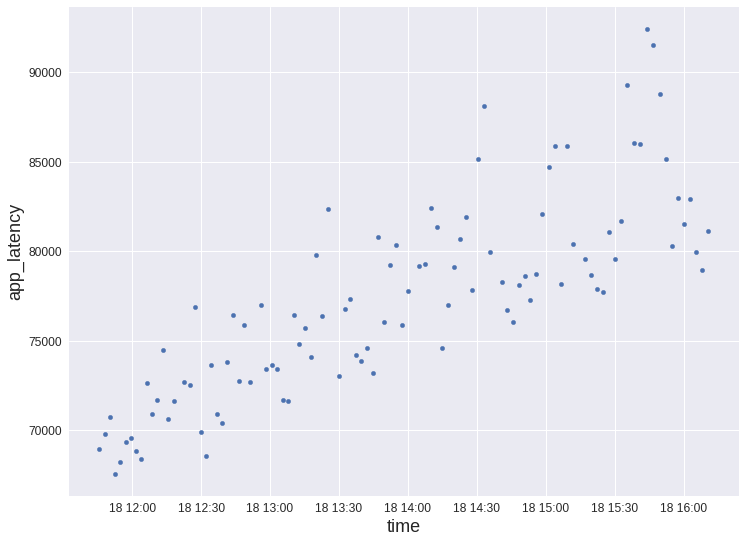

In [9]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')
plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.eps', format='eps')

In [4]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_latency'>

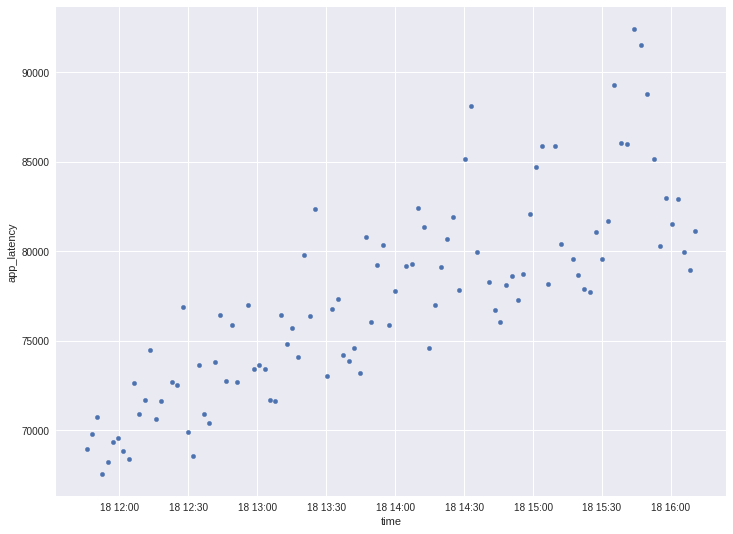

In [5]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

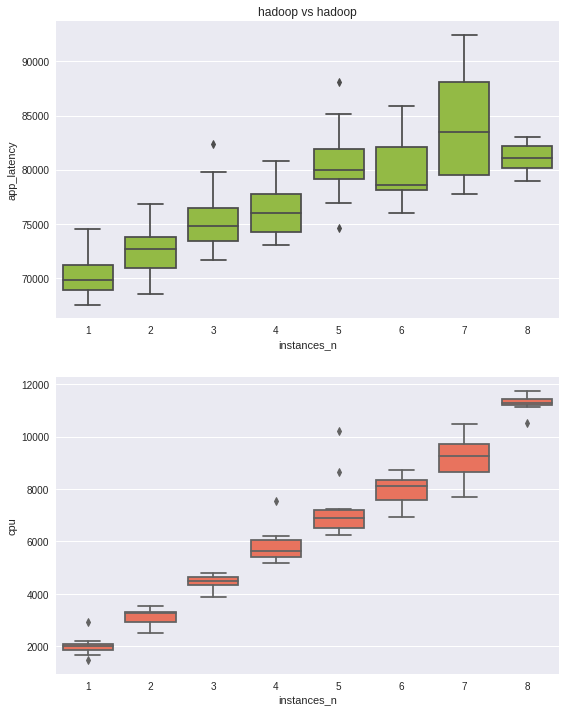

In [6]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function

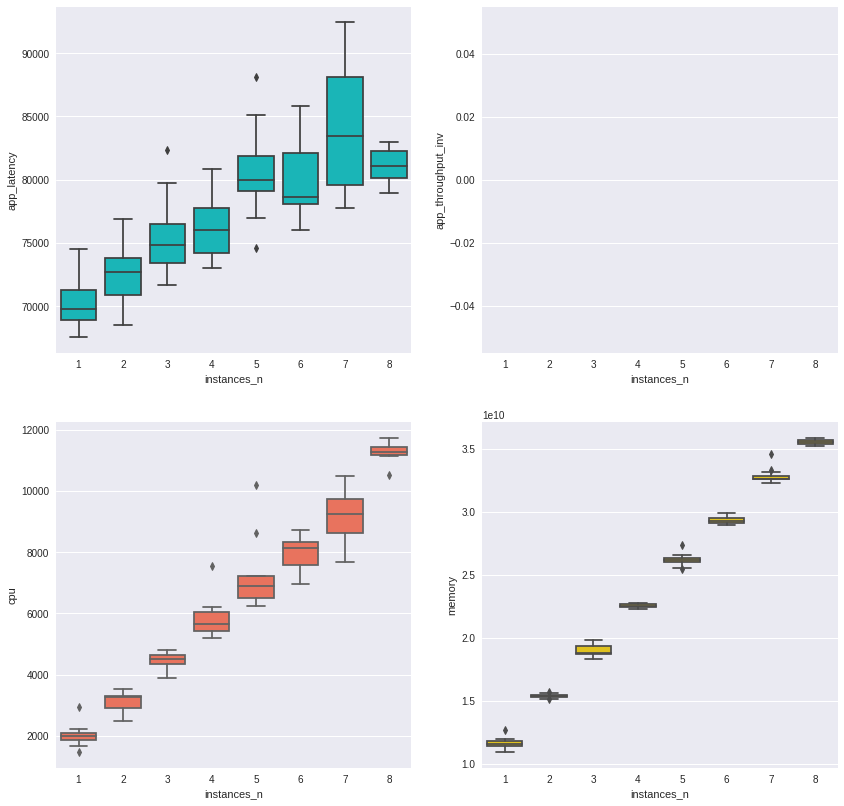

In [7]:
boxplot_grid(
    var_names=[['app_latency', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [8]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.72e-22
Time:                        23:59:40   Log-Likelihood:                -963.21
No. Observations:                 101   AIC:                             1930.
Df Residuals:                      99   BIC:                             1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.908e+04    728.202     94.863      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


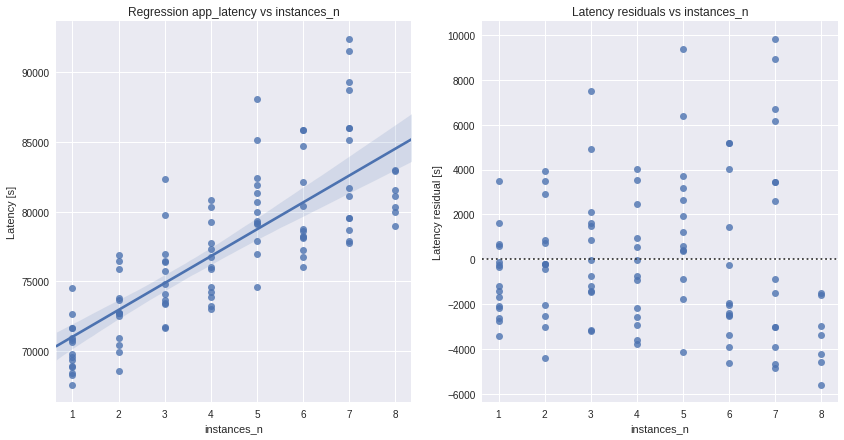

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xticks(range(1,9))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xticks(range(1,9))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

### Regression - trimmed

In [10]:
trim=6
df = trim_experiment(df, trim)

In [11]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
# results = fit_regression(data=df, formula=f'app_throughput ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           8.40e-18
Time:                        23:59:41   Log-Likelihood:                -750.66
No. Observations:                  80   AIC:                             1505.
Df Residuals:                      78   BIC:                             1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.856e+04    724.168     94.675      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


In [12]:
# for table in results.summary().tables:
#     print(table.as_latex_tabular())

#### Pvalues

In [13]:
results.pvalues

Intercept      2.850153e-82
instances_n    8.398115e-18
dtype: float64

In [14]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 2096.843807


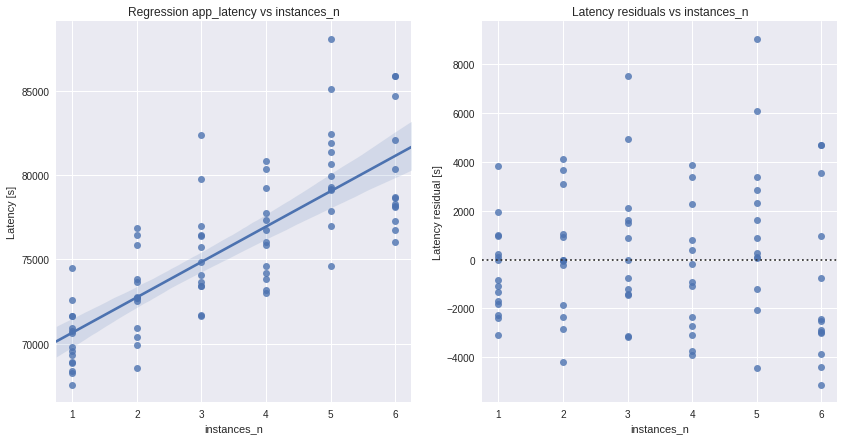

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xticks(range(1,7))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xticks(range(1,7))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - CPU

In [16]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     91.83
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           8.03e-15
Time:                        23:59:41   Log-Likelihood:                -757.63
No. Observations:                  80   AIC:                             1519.
Df Residuals:                      78   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.808e+04    877.613     77.573      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs cpu')

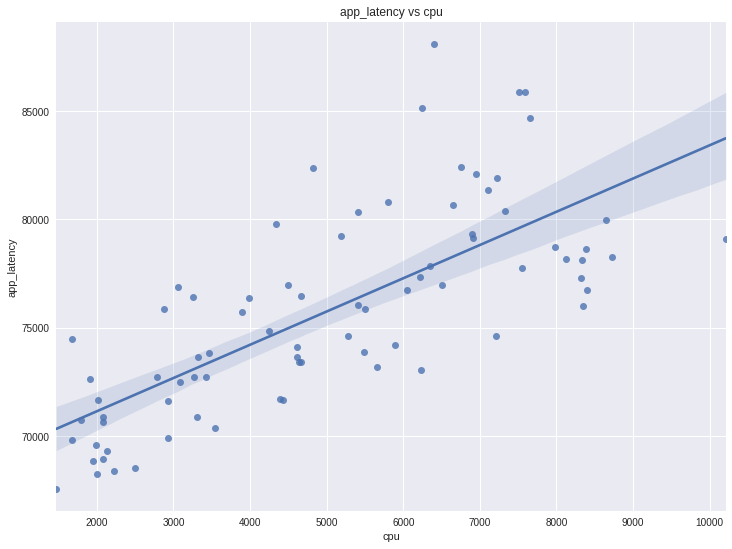

In [17]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

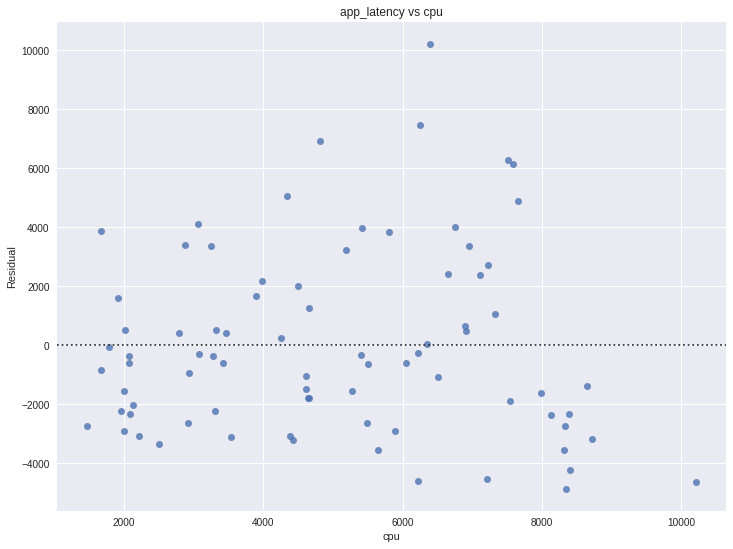

In [18]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [19]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     128.9
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           3.37e-18
Time:                        23:59:41   Log-Likelihood:                -749.73
No. Observations:                  80   AIC:                             1503.
Df Residuals:                      78   BIC:                             1508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.362e+04   1117.160     56.949      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs memory')

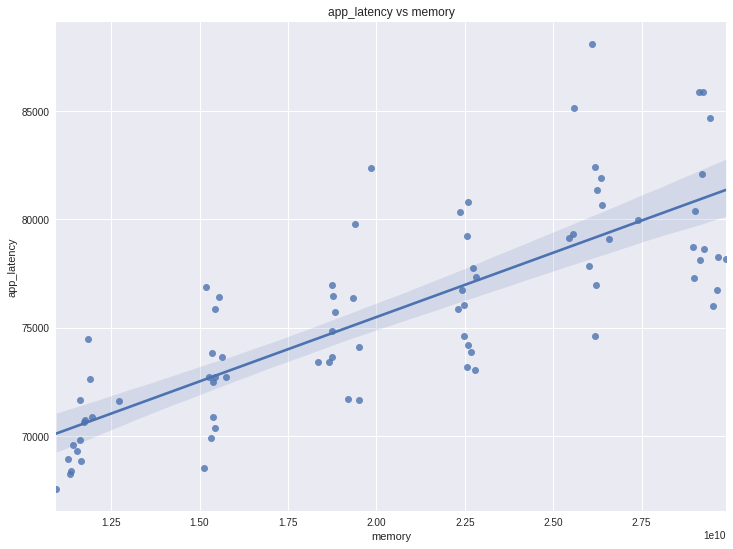

In [20]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

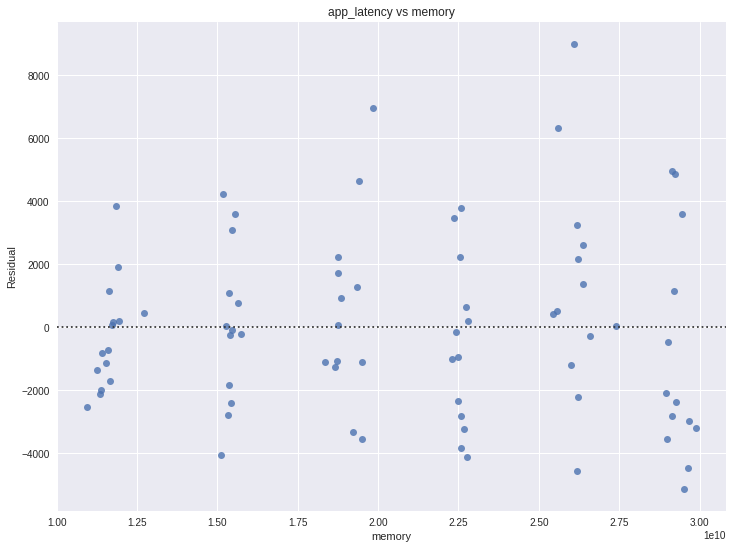

In [21]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [22]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     62.91
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           6.41e-17
Time:                        23:59:42   Log-Likelihood:                -750.02
No. Observations:                  80   AIC:                             1506.
Df Residuals:                      77   BIC:                             1513.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.903e+04    837.318     82.443      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


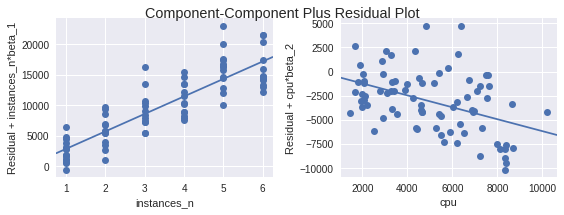

In [23]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [24]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     46.90
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           2.91e-17
Time:                        23:59:42   Log-Likelihood:                -746.85
No. Observations:                  80   AIC:                             1502.
Df Residuals:                      76   BIC:                             1511.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.01e+04   7601.425      6.590      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


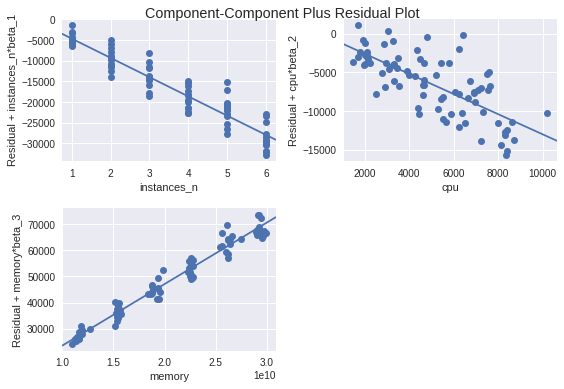

In [25]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

## Hadoop vs Redis YCSB

In [26]:
instances_n=12
experiment_name='hadoop_1_redis_ycsb_11'
workload_a = 'hadoop'
workload_b = 'redis_ycsb'
perf_metric = 'app_latency'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

<AxesSubplot:xlabel='time', ylabel='app_latency'>

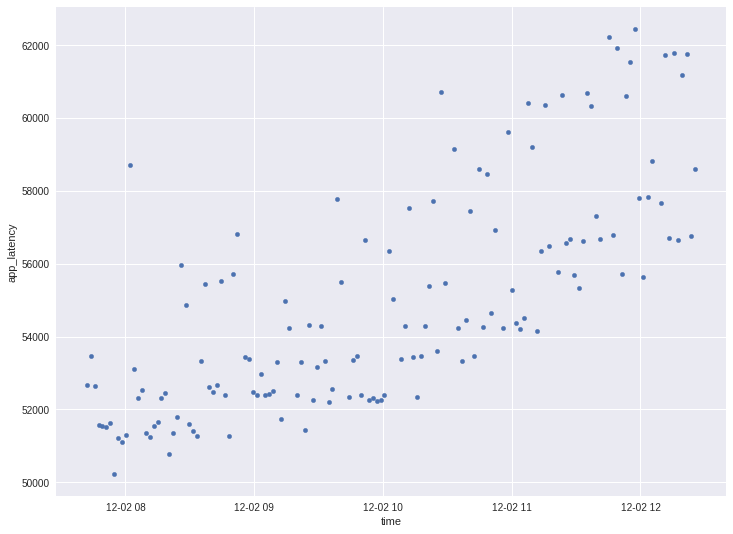

In [27]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [28]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_latency'>

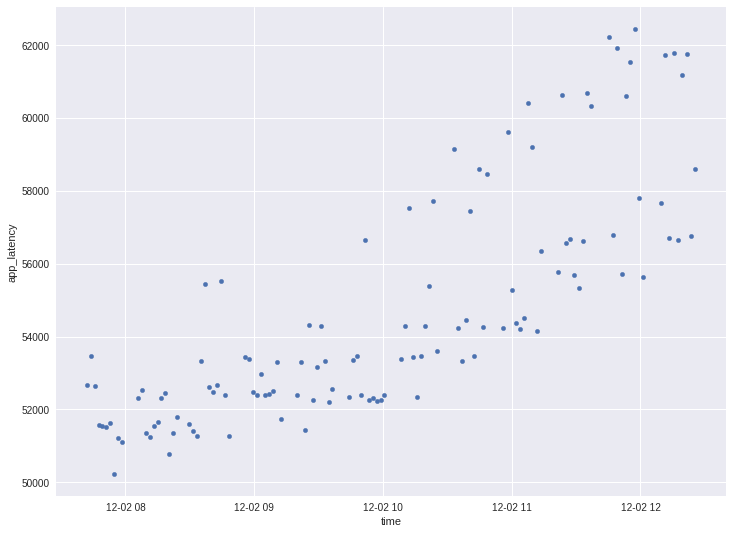

In [29]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

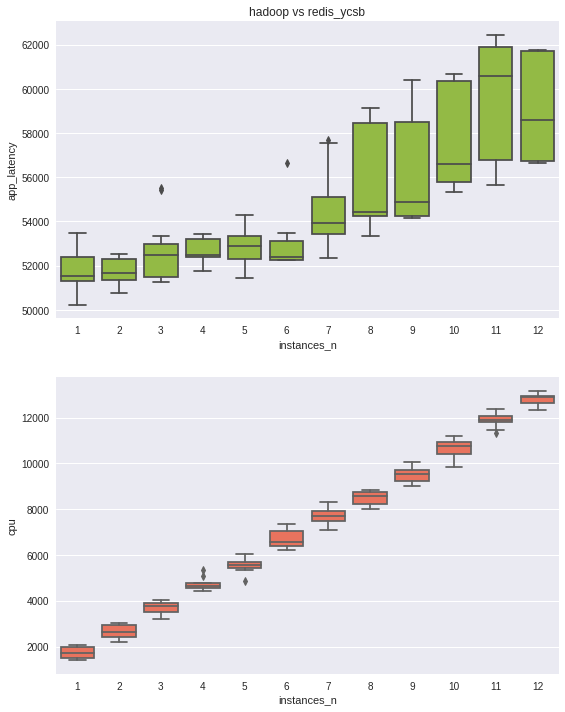

In [30]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value enc

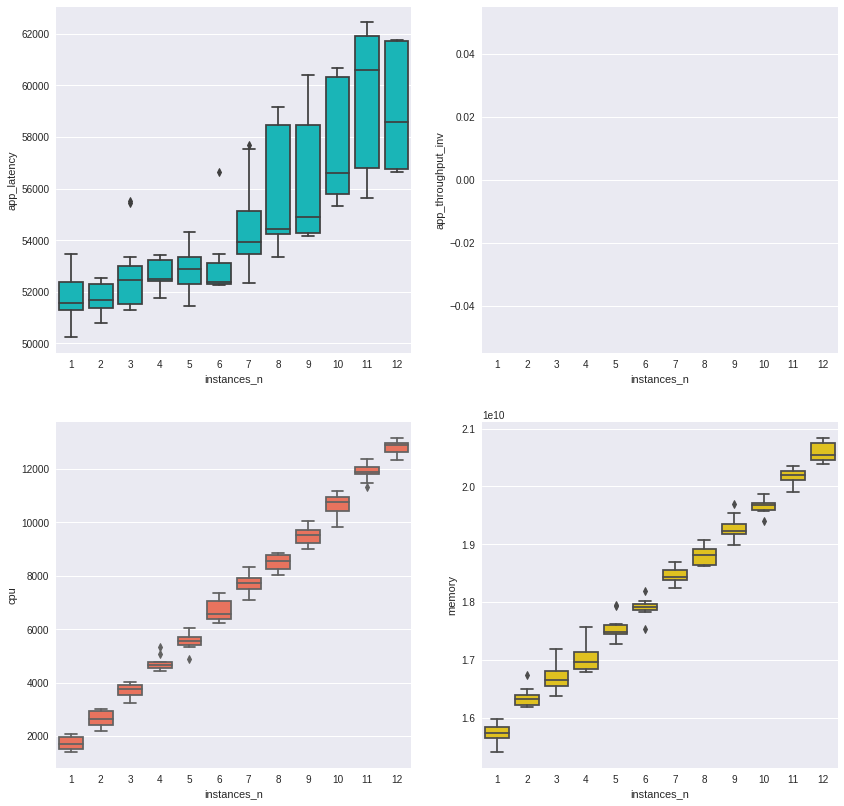

In [31]:
boxplot_grid(
    var_names=[['app_latency', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [32]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           4.89e-28
Time:                        23:59:45   Log-Likelihood:                -1056.2
No. Observations:                 118   AIC:                             2116.
Df Residuals:                     116   BIC:                             2122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.002e+04    362.208    138.090      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


In [33]:
# h = df[['app_latency', 'cpu', 'memory', 'instances_n', 'app_completion_time']].head(5)
# t = df[['app_latency', 'cpu', 'memory', 'instances_n', 'app_completion_time']].tail(5)
# print(h.append(t).to_latex())

# for table in results.summary().tables:
#     print(table.as_latex_tabular())

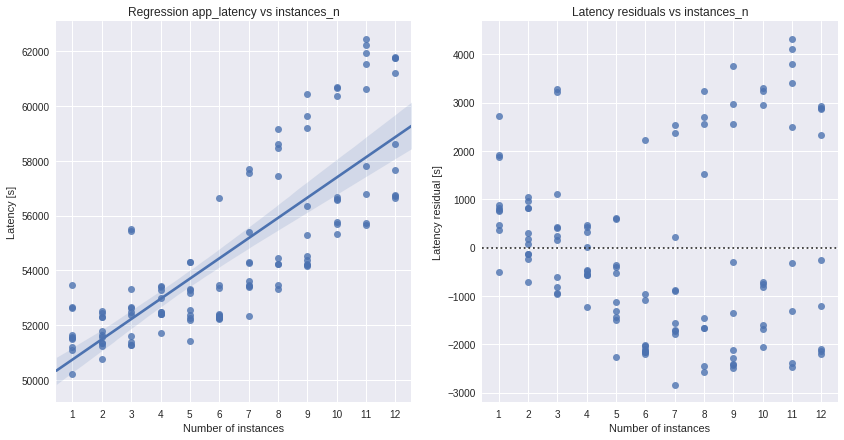

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,13))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xlabel('Number of instances')
ax2.set_xticks(range(1,13))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

### Regression - trimmed

In [35]:
trim=8
df = trim_experiment(df, trim)

In [36]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     54.31
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.46e-10
Time:                        23:59:46   Log-Likelihood:                -702.28
No. Observations:                  81   AIC:                             1409.
Df Residuals:                      79   BIC:                             1413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.083e+04    347.018    146.491      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


#### Pvalues

In [37]:
results.pvalues

Intercept      5.581460e-98
instances_n    1.457190e-10
dtype: float64

In [38]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 516.077986


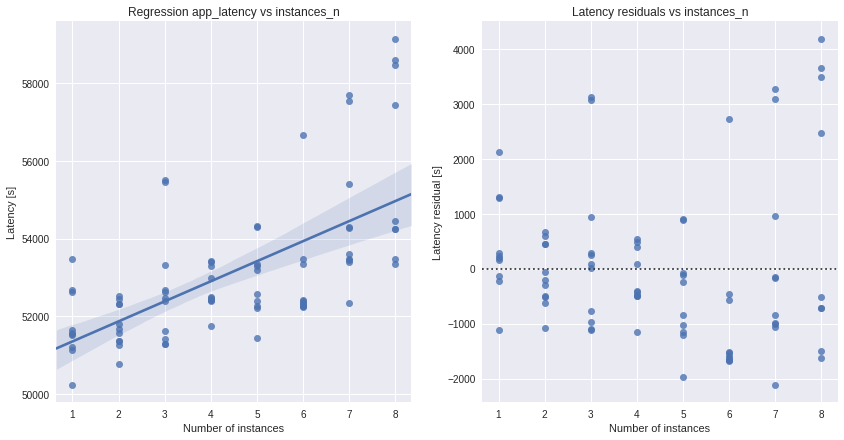

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,9))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xlabel('Number of instances')
ax2.set_xticks(range(1,9))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - CPU

In [42]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     52.36
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           2.63e-10
Time:                        23:59:47   Log-Likelihood:                -702.88
No. Observations:                  81   AIC:                             1410.
Df Residuals:                      79   BIC:                             1415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.05e+04    394.468    128.020      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs cpu')

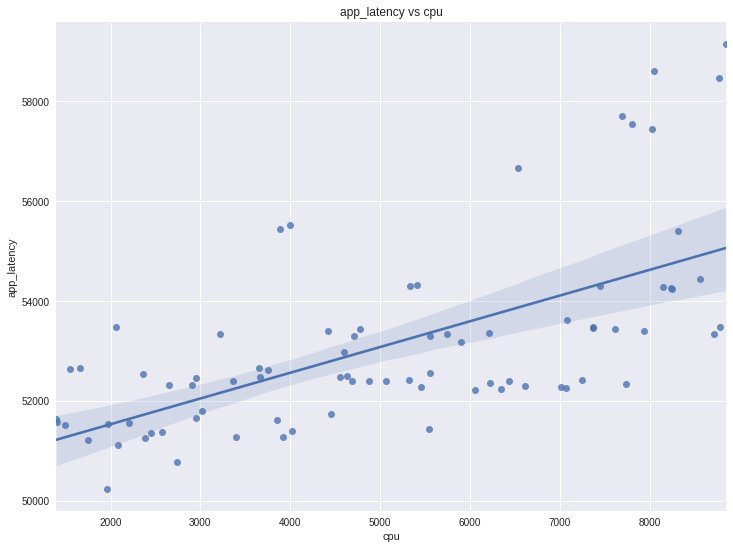

In [43]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

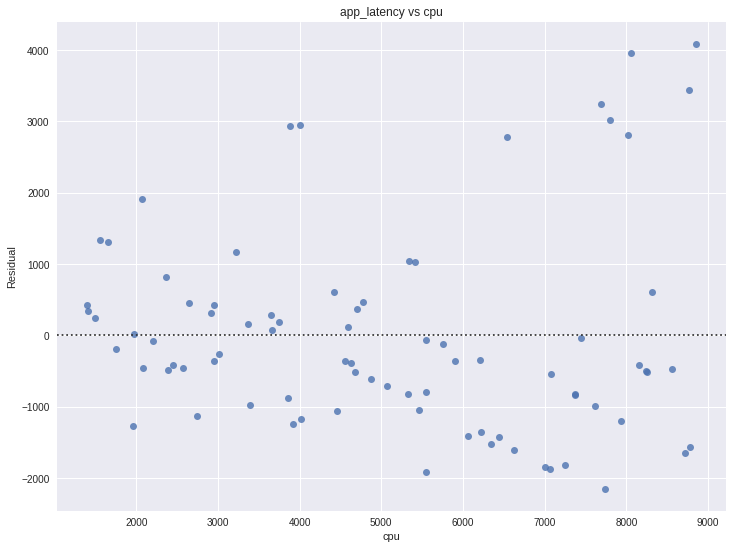

In [44]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [45]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     53.04
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           2.14e-10
Time:                        23:59:47   Log-Likelihood:                -702.67
No. Observations:                  81   AIC:                             1409.
Df Residuals:                      79   BIC:                             1414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.309e+04   2753.922     12.014      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs memory')

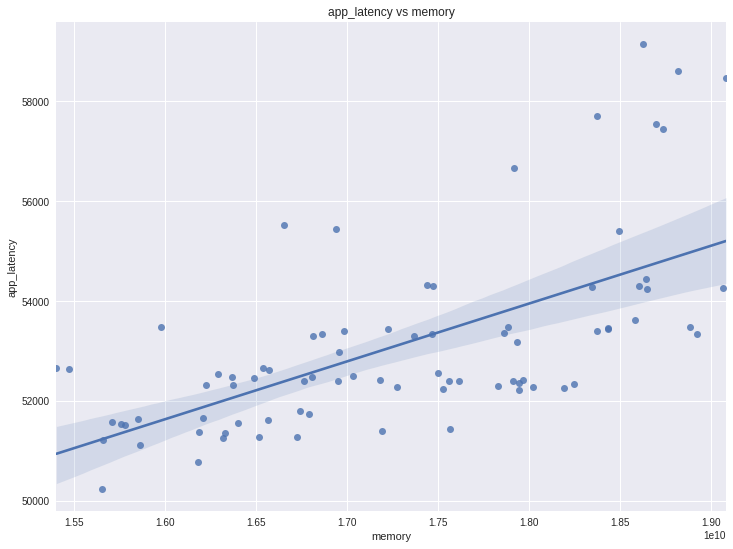

In [46]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

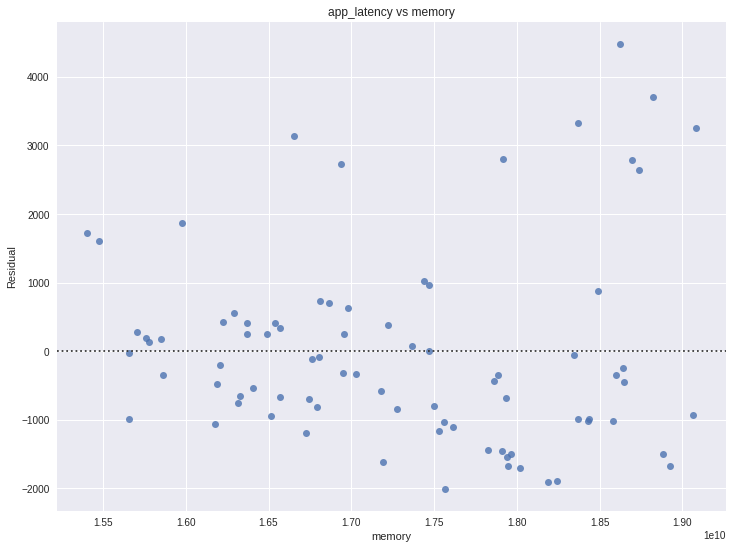

In [47]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [48]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     26.81
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.37e-09
Time:                        23:59:48   Log-Likelihood:                -702.28
No. Observations:                  81   AIC:                             1411.
Df Residuals:                      78   BIC:                             1418.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.085e+04    512.730     99.181      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


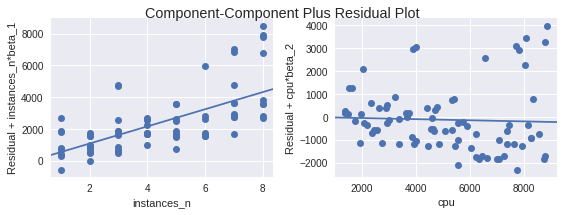

In [49]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [50]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     17.77
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           7.34e-09
Time:                        23:59:48   Log-Likelihood:                -702.16
No. Observations:                  81   AIC:                             1412.
Df Residuals:                      77   BIC:                             1422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.474e+04    1.3e+04      3.445      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


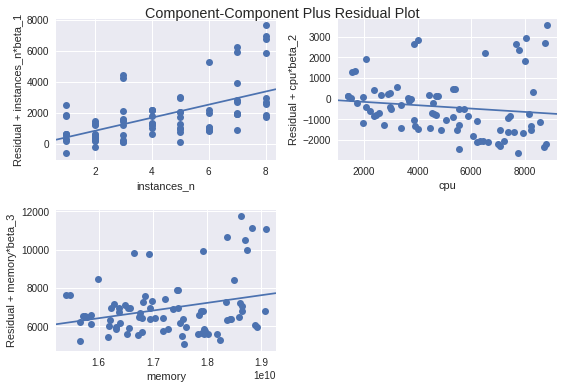

In [51]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

## Hadoop vs Linpack

In [52]:
instances_n=8
experiment_name='hadoop_pagerank_1_linpack_7'
workload_a = 'hadoop'
workload_b = 'linpack'
perf_metric = 'app_latency'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

<AxesSubplot:xlabel='time', ylabel='app_latency'>

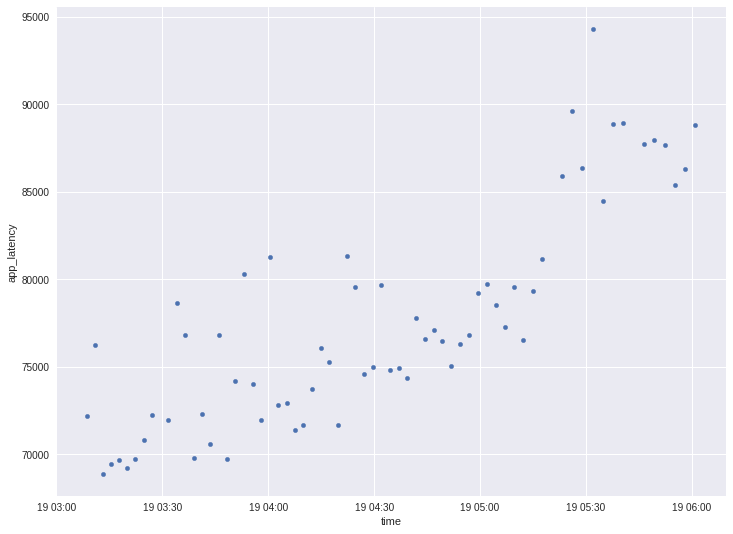

In [53]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [54]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_latency'>

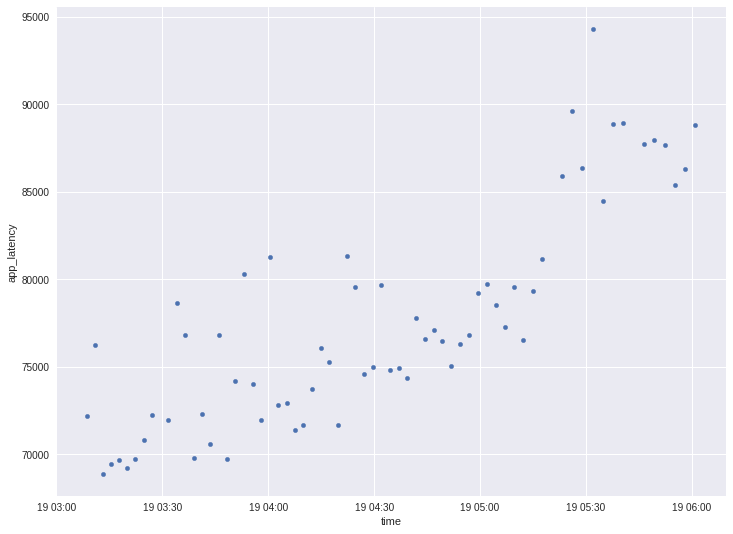

In [55]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

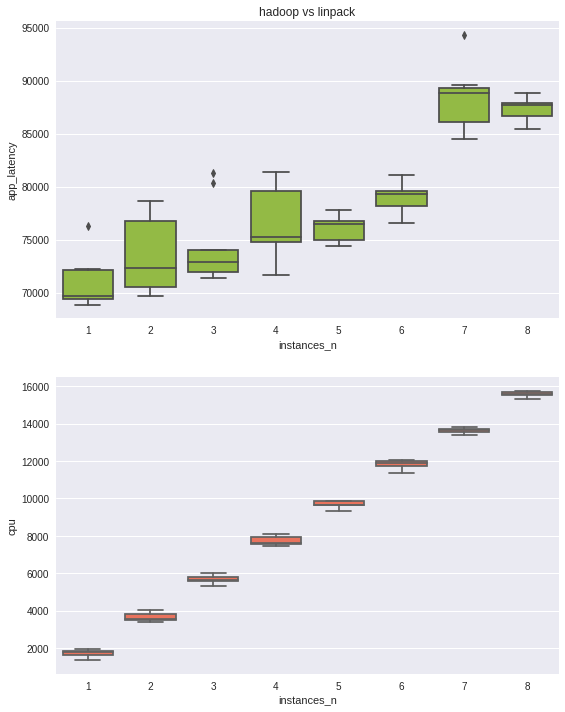

In [56]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-pa

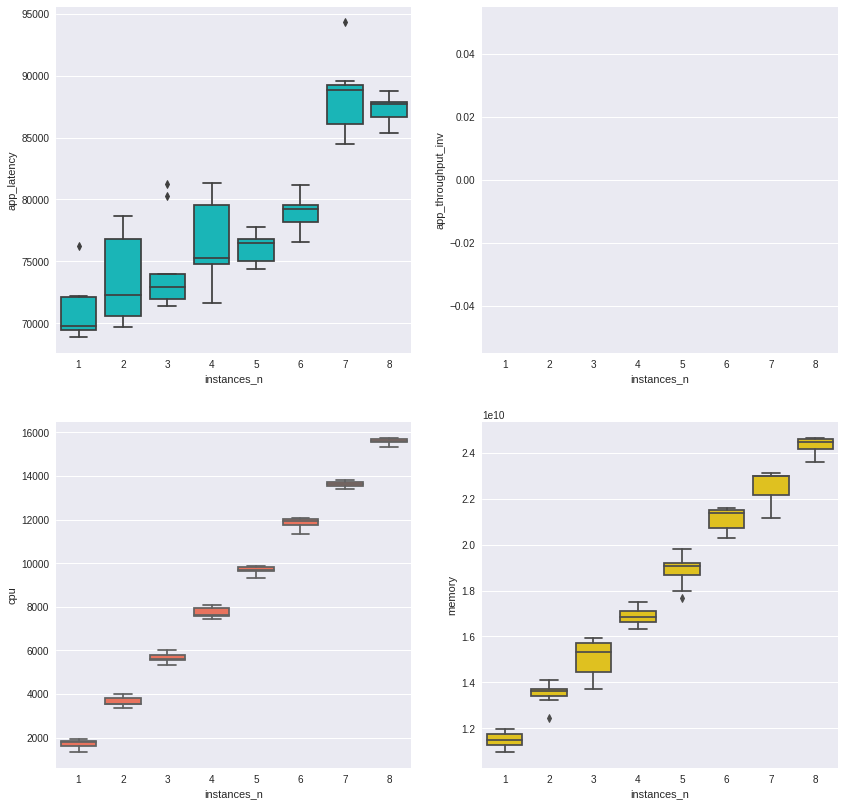

In [57]:
boxplot_grid(
    var_names=[['app_latency', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [58]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.06e-18
Time:                        23:59:51   Log-Likelihood:                -628.80
No. Observations:                  66   AIC:                             1262.
Df Residuals:                      64   BIC:                             1266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.761e+04    899.102     75.195      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


In [59]:
# h = df[['app_latency', 'cpu', 'memory', 'instances_n', 'app_completion_time']].head(5)
# t = df[['app_latency', 'cpu', 'memory', 'instances_n', 'app_completion_time']].tail(5)
# print(h.append(t).to_latex())

# for table in results.summary().tables:
#     print(table.as_latex_tabular())

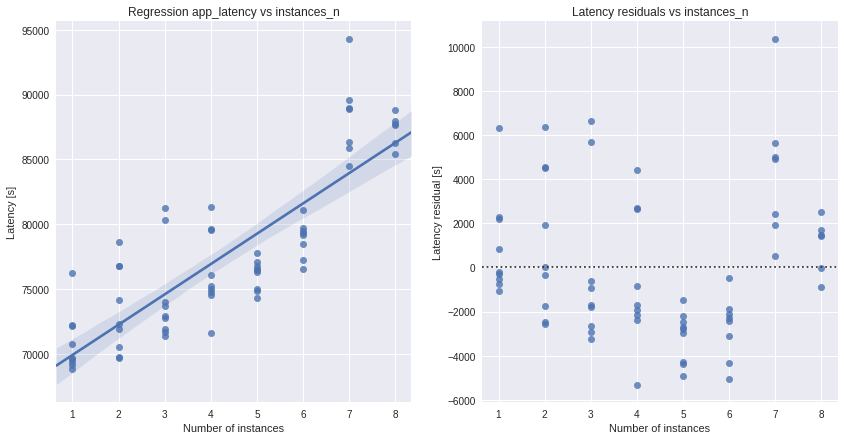

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,9))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xlabel('Number of instances')
ax2.set_xticks(range(1,9))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

### Regression - trimmed

In [61]:
trim=4
df = trim_experiment(df, trim)

In [62]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     14.58
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           0.000544
Time:                        23:59:52   Log-Likelihood:                -339.29
No. Observations:                  36   AIC:                             682.6
Df Residuals:                      34   BIC:                             685.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.941e+04   1259.596     55.108      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


#### Pvalues

In [63]:
results.pvalues

Intercept      7.708325e-35
instances_n    5.436235e-04
dtype: float64

In [64]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 1756.100000


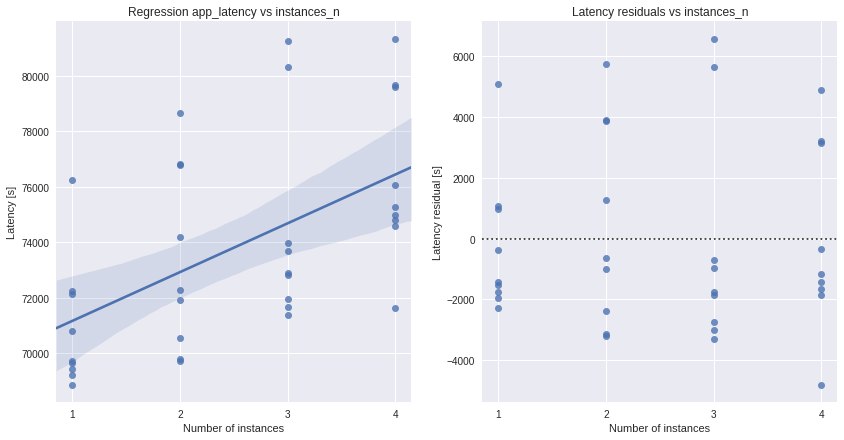

In [65]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,5))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xlabel('Number of instances')
ax2.set_xticks(range(1,5))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - CPU

In [66]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     12.97
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           0.000997
Time:                        23:59:52   Log-Likelihood:                -339.90
No. Observations:                  36   AIC:                             683.8
Df Residuals:                      34   BIC:                             687.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.989e+04   1205.570     57.974      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs cpu')

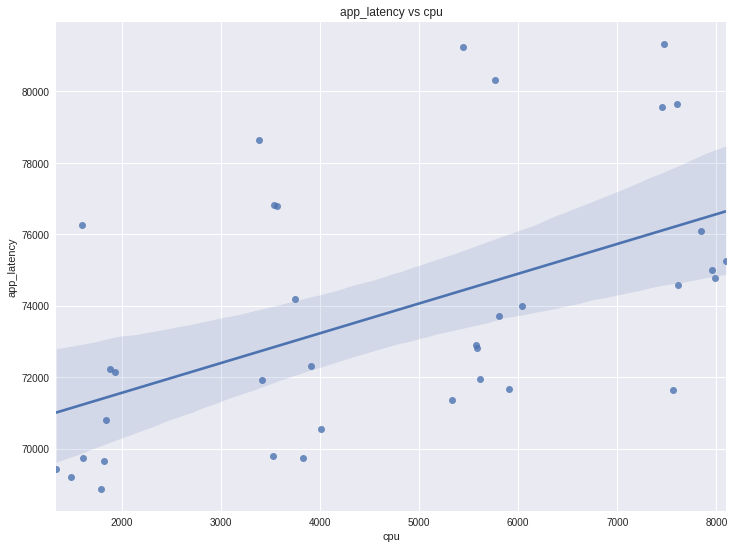

In [67]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

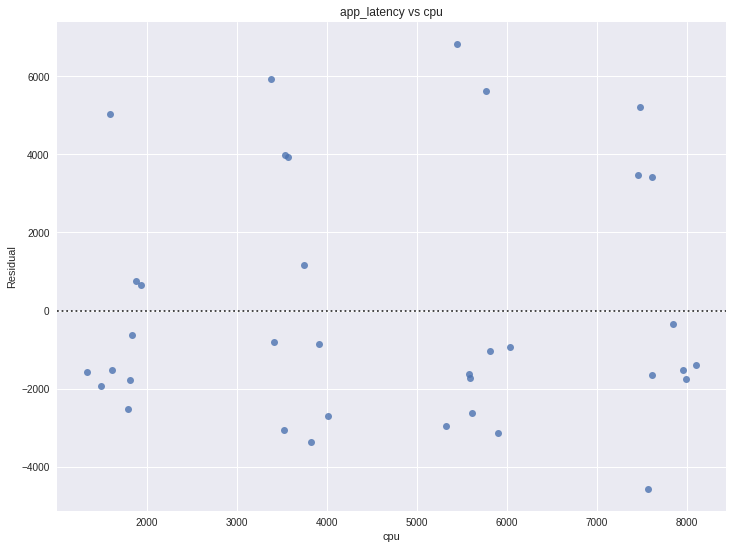

In [68]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [69]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     16.32
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           0.000289
Time:                        23:59:53   Log-Likelihood:                -338.66
No. Observations:                  36   AIC:                             681.3
Df Residuals:                      34   BIC:                             684.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.971e+04   3526.116     16.933      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs memory')

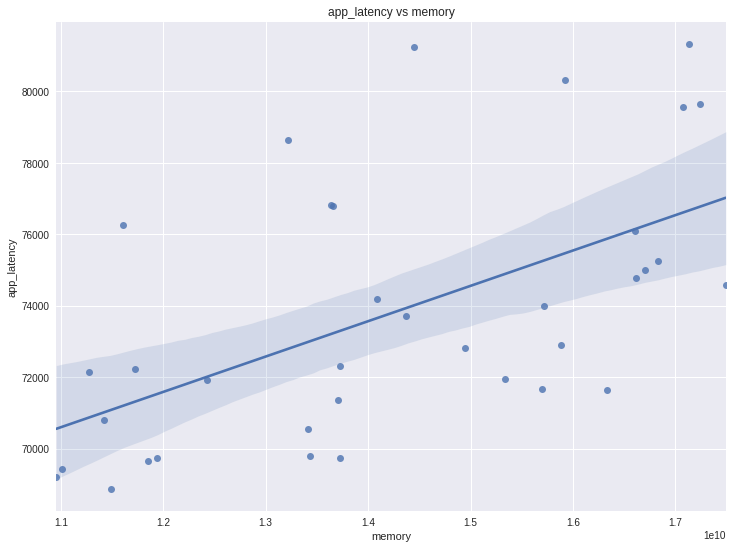

In [70]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

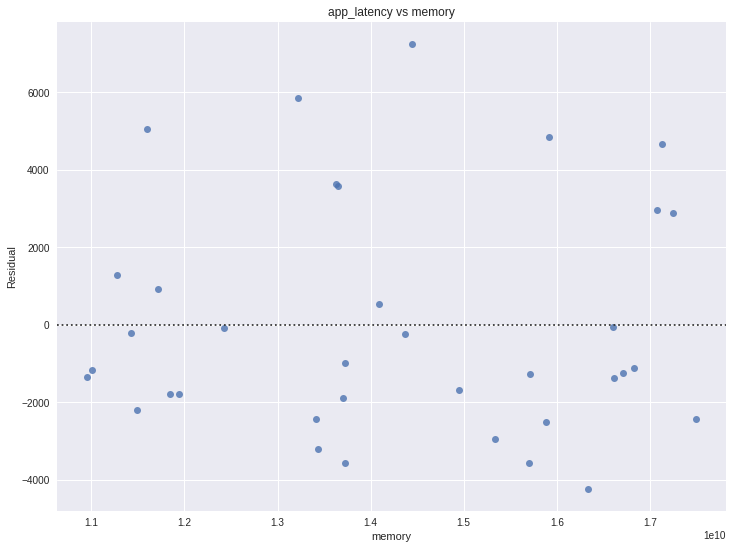

In [71]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [72]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     8.692
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           0.000928
Time:                        23:59:53   Log-Likelihood:                -338.10
No. Observations:                  36   AIC:                             682.2
Df Residuals:                      33   BIC:                             686.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.821e+04   1474.428     46.259      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


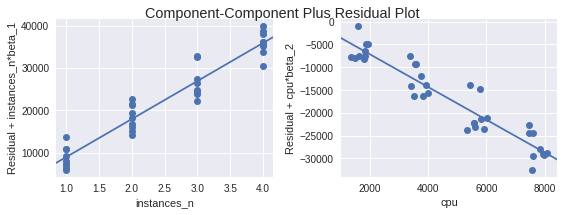

In [73]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [74]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     7.165
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           0.000820
Time:                        23:59:54   Log-Likelihood:                -336.47
No. Observations:                  36   AIC:                             680.9
Df Residuals:                      32   BIC:                             687.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.013e+04   1.05e+04      4.788      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


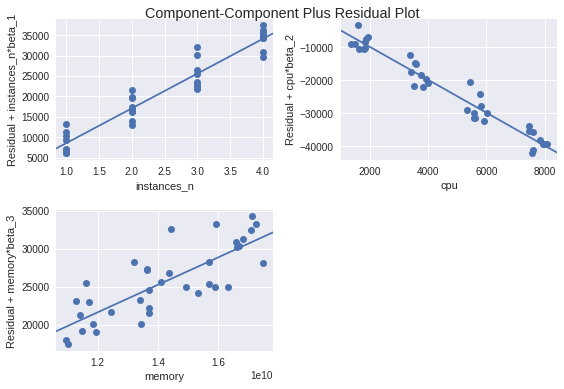

In [75]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

## Hadoop vs Sysbench

In [76]:
instances_n=12
experiment_name='hadoop_pagerank_1_sysbench_11'
workload_a = 'hadoop'
workload_b = 'sysbench'
perf_metric = 'app_latency'
path = get_experiments_paths(experiment_name, experiments_path)[0]
df = get_data_with_cpu(path, instances_n=instances_n, cpu_window=30)
df['time'] = pd.to_datetime(df['cbtool_time'], unit='s')

<AxesSubplot:xlabel='time', ylabel='app_latency'>

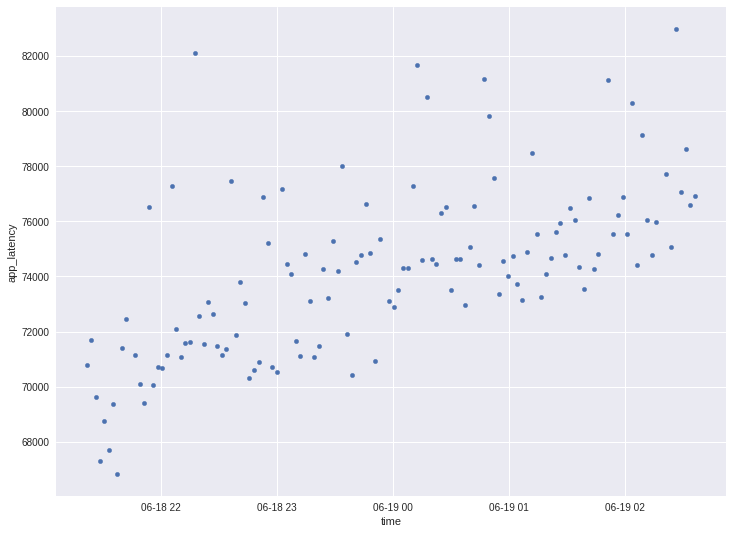

In [77]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

In [78]:
df = remove_setup_datapoints(df, path)

<AxesSubplot:xlabel='time', ylabel='app_latency'>

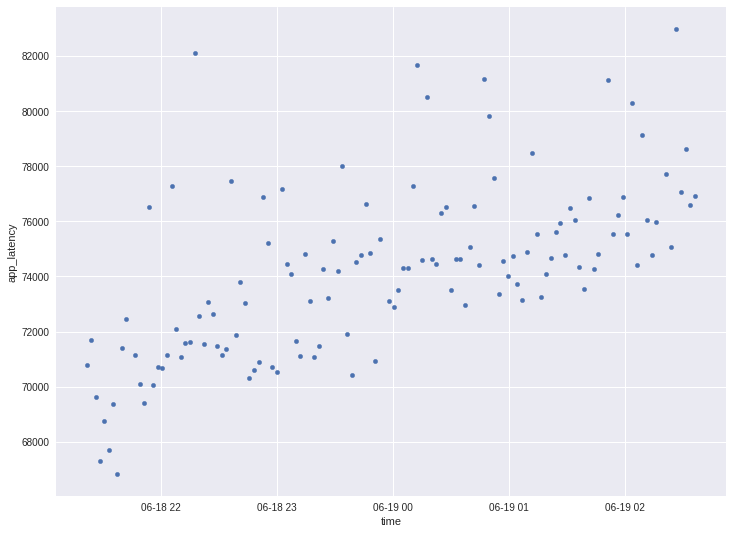

In [79]:
df.plot.scatter(x='time', y=perf_metric, figsize=(12, 9))
# plt.savefig(f'graphs/{experiment_name}_perf_time_scatter.png', bbox_inches='tight')

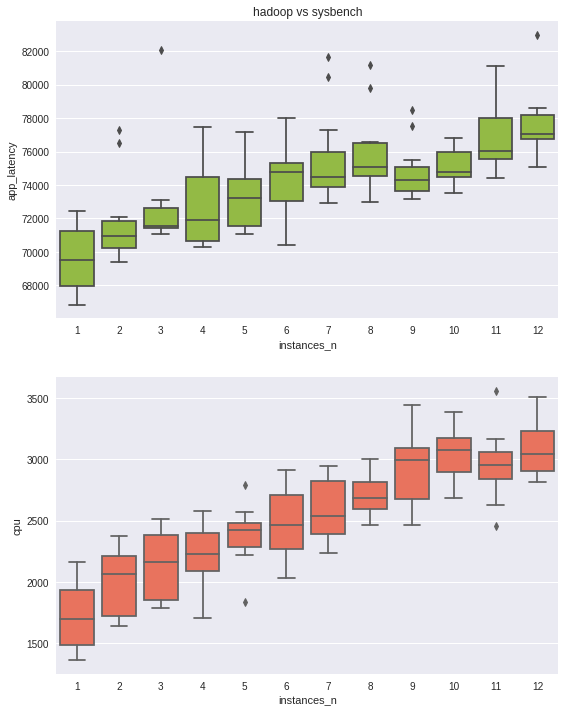

In [80]:
boxplot_two(perf_metric, 'cpu', df, (9,12), title=f'{workload_a} vs {workload_b}')
# plt.savefig(f'graphs/{experiment_name}_perf+cpu.png', bbox_inches='tight')

/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/godul/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/godul/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value enc

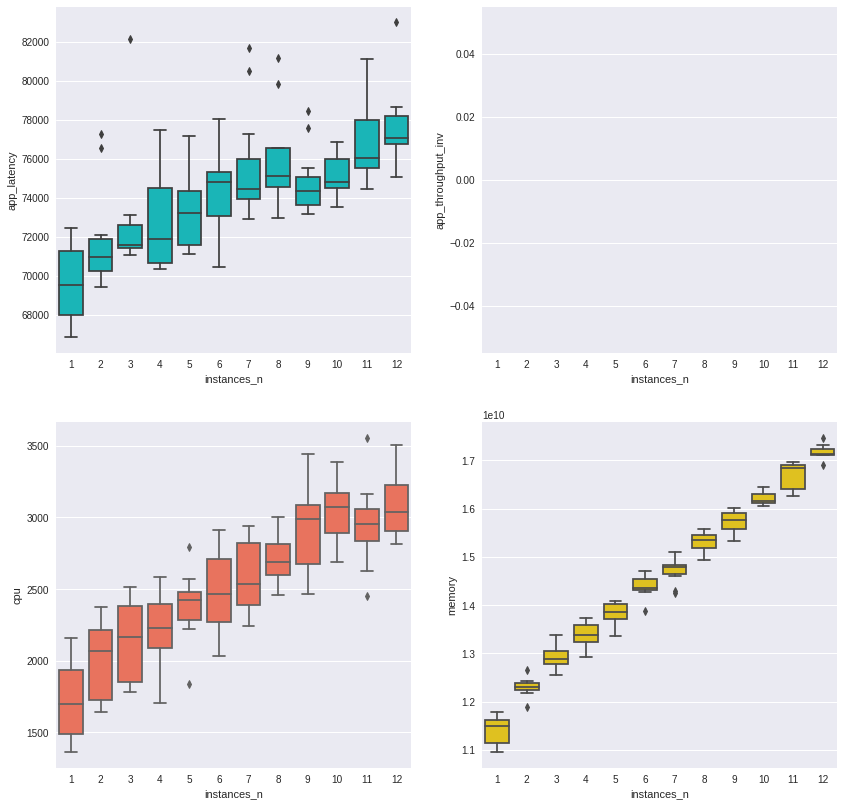

In [81]:
boxplot_grid(
    var_names=[['app_latency', 'app_throughput_inv'], ['cpu', 'memory']],
    figsize=[14, 14],
    dfs=[[df, df], [df, df]],
    titles=None,
    ylabels=None,
    suptitle=None
)

### Regression - whole experiment

In [82]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     85.61
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           7.63e-16
Time:                        23:59:58   Log-Likelihood:                -1167.2
No. Observations:                 127   AIC:                             2338.
Df Residuals:                     125   BIC:                             2344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     7.04e+04    461.331    152.601      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


#### Pvalues

In [83]:
results.pvalues

Intercept      6.617771e-144
instances_n     7.626400e-16
dtype: float64

In [84]:
print(f'Coefficient for instances_n: {results.params[1]:.6f}')

Coefficient for instances_n: 589.892526


In [85]:
# h = df[['app_latency', 'cpu', 'memory', 'instances_n', 'app_completion_time']].head(5)
# t = df[['app_latency', 'cpu', 'memory', 'instances_n', 'app_completion_time']].tail(5)
# print(h.append(t).to_latex())

# for table in results.summary().tables:
#     print(table.as_latex_tabular())

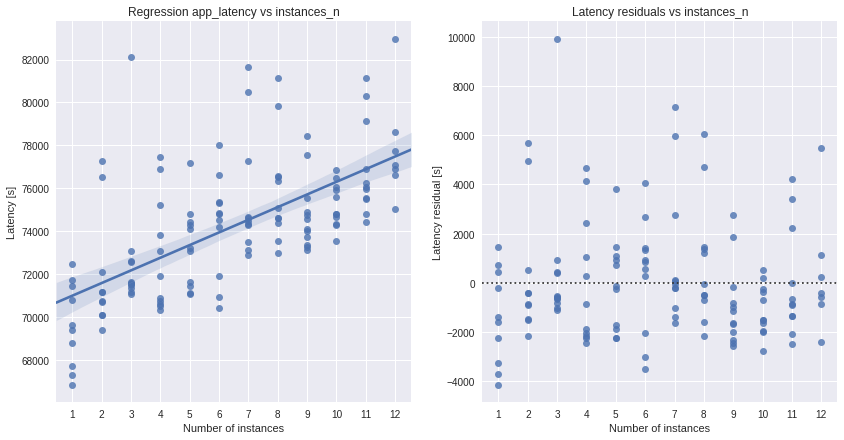

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.regplot(x='instances_n', y=perf_metric, data=df, ax=ax1, truncate=False)
ax1.set_title(f'Regression {perf_metric} vs instances_n')
ax1.set_ylabel(f'Latency [s]')
ax1.set_xlabel('Number of instances')
ax1.set_xticks(range(1,13))

sns.residplot(x='instances_n', y=perf_metric, data=df, ax=ax2)
ax2.set_title(f'Latency residuals vs instances_n')
ax2.set_ylabel(f'Latency residual [s]')
ax2.set_xlabel('Number of instances')
ax2.set_xticks(range(1,13))

pass
# plt.savefig(f'graphs/{experiment_name}_instances_n_regplot_residplot.png', bbox_inches='tight')

#### Regression - CPU

In [87]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     39.90
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           4.27e-09
Time:                        23:59:58   Log-Likelihood:                -1182.7
No. Observations:                 127   AIC:                             2369.
Df Residuals:                     125   BIC:                             2375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.627e+04   1276.009     51.938      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs cpu')

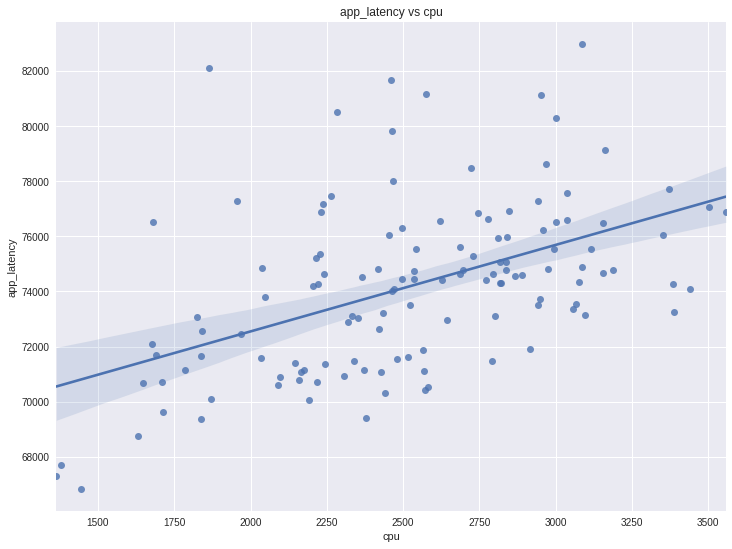

In [88]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')

Text(0, 0.5, 'Residual')

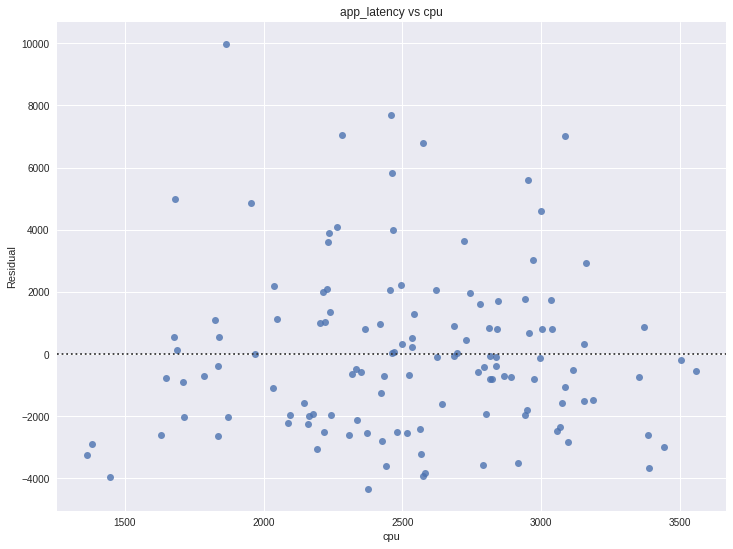

In [89]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='cpu', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs cpu')
ax.set_ylabel(f'Residual')

#### Regression - Memory

In [90]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     86.32
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           6.17e-16
Time:                        23:59:59   Log-Likelihood:                -1167.0
No. Observations:                 127   AIC:                             2338.
Df Residuals:                     125   BIC:                             2344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.721e+04   1839.521     31.102      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


Text(0.5, 1.0, 'app_latency vs memory')

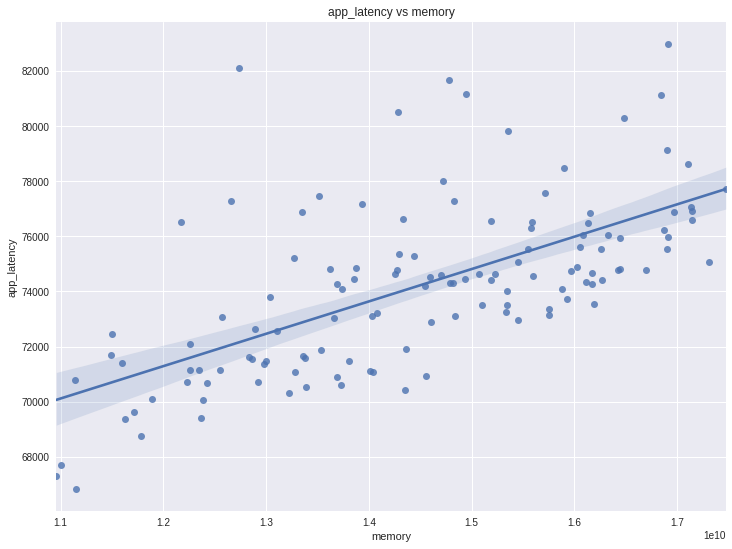

In [91]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.regplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')

Text(0, 0.5, 'Residual')

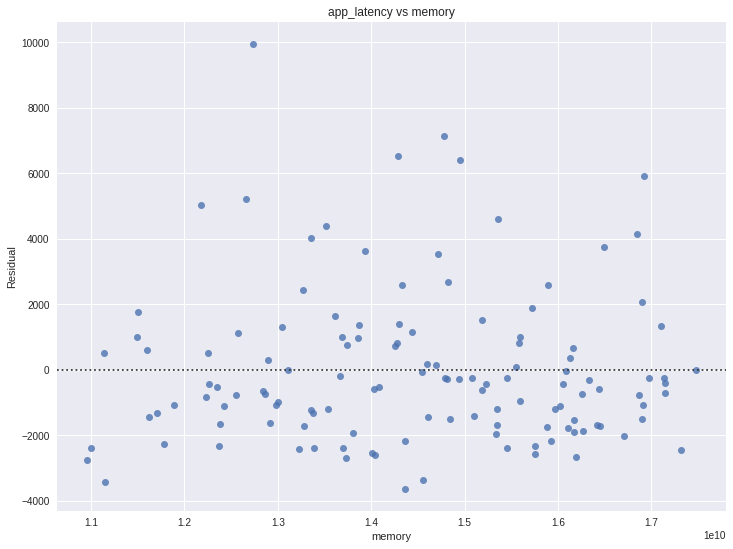

In [92]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.residplot(x='memory', y=perf_metric, data=df)
ax.set_title(f'{perf_metric} vs memory')
ax.set_ylabel(f'Residual')

In [93]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     43.52
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           4.80e-15
Time:                        00:00:00   Log-Likelihood:                -1166.6
No. Observations:                 127   AIC:                             2339.
Df Residuals:                     124   BIC:                             2348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.197e+04   1474.383     48.812      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


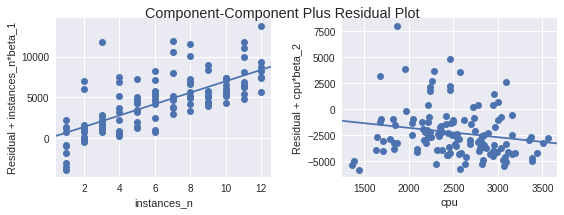

In [94]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)

In [95]:
results = fit_regression(data=df, formula=f'{perf_metric} ~ instances_n + cpu + memory')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     29.80
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           1.49e-14
Time:                        00:00:00   Log-Likelihood:                -1165.6
No. Observations:                 127   AIC:                             2339.
Df Residuals:                     123   BIC:                             2351.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.966e+04   9276.584      6.431      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


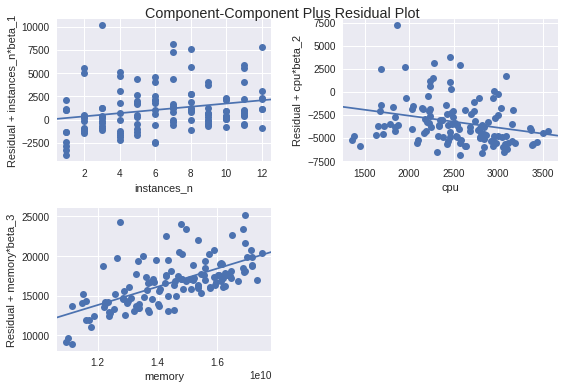

In [96]:
sm.graphics.plot_ccpr_grid(results)
fig.tight_layout(pad=1.0)